## Predicting housing prices with linear regression

In [1]:
import pandas as pd
import numpy as np

In [2]:
houses_df = pd.read_csv('housing_price_regression.csv')

### Dataset consists of 2051 homes, 5 features, and target

In [3]:
houses_df = houses_df[['Overall Qual', 'Overall Cond', 'Gr Liv Area', 'Garage Area', 
                       'Mas Vnr Area', 'SalePrice', 'target']]

In [4]:
houses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 7 columns):
Overall Qual    2051 non-null int64
Overall Cond    2051 non-null int64
Gr Liv Area     2051 non-null int64
Garage Area     2051 non-null float64
Mas Vnr Area    2051 non-null float64
SalePrice       2051 non-null int64
target          2051 non-null int64
dtypes: float64(2), int64(5)
memory usage: 112.2 KB


In [5]:
houses_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Overall Qual,2051.0,6.112140,1.426271,1.0,5.0,6.0,7.0,10.0
Overall Cond,2051.0,5.562165,1.104497,1.0,5.0,5.0,6.0,9.0
Gr Liv Area,2051.0,1499.330083,500.447829,334.0,1129.0,1444.0,1728.5,5642.0
Garage Area,2051.0,473.440761,216.135102,0.0,319.0,480.0,576.0,1418.0
Mas Vnr Area,2051.0,98.626524,174.324690,0.0,0.0,0.0,159.0,1600.0
SalePrice,2051.0,181469.701609,79258.659352,12789.0,129825.0,162500.0,214000.0,611657.0
target,2051.0,181469.701609,79258.659352,12789.0,129825.0,162500.0,214000.0,611657.0


### Target is price

In [6]:
houses_df['SalePrice'].head()

0    130500
1    220000
2    109000
3    174000
4    138500
Name: SalePrice, dtype: int64

In [7]:
y = houses_df['SalePrice']
X = houses_df.drop(columns=['SalePrice', 'target'])

In [8]:
houses_df.shape

(2051, 7)

### Train/test split

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV, Lasso, LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [10]:
#predictions = {}
r2_train_mean = []
r2_test_mean = []


for test_size in np.linspace(.01, .99, 20):
    r2_train = []
    r2_test = []
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size)

    ss = StandardScaler()
    X_train_sc = ss.fit_transform(X_train)
    X_test_sc = ss.transform(X_test)

    lasso = LassoCV(cv = 5)
    lasso.fit(X_train_sc, y_train)

    r2_train.append(lasso.score(X_train_sc, y_train))
    r2_test.append(lasso.score(X_test_sc, y_test))
    
    r2_train_mean.append(np.mean(r2_train))
    r2_test_mean.append(np.mean(r2_test))
    #predictions[test_size] = lasso.predict(X_test)

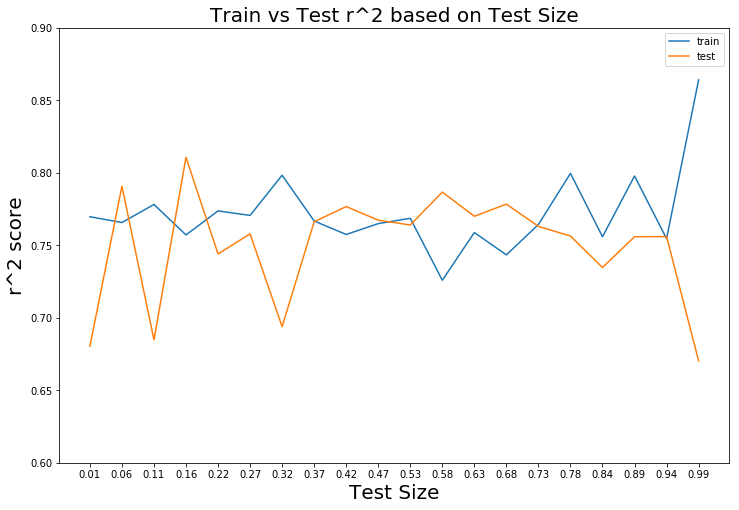

In [11]:
plt.figure(figsize = (12,8))
plt.title('Train vs Test r^2 based on Test Size', fontsize = 20)
plt.xticks(ticks = range(0,20), labels =  np.round(np.linspace(.01,.99,20), 2))
plt.xlabel('Test Size', fontsize = 20)
plt.ylabel('r^2 score', fontsize = 20)
plt.ylim([.6, .9])
plt.plot(r2_train_mean)
plt.plot(r2_test_mean)
plt.legend(labels = ['train', 'test']);

### Let's try with a smaller dataset

In [12]:
small_house_df = houses_df.sample(frac = .05)

In [13]:
small_house_df.shape

(103, 7)

In [14]:
y_small = houses_df['SalePrice']
X_small = houses_df.drop(columns=['SalePrice', 'target'])

In [15]:
#predictions = {}
r2_train_mean = []
r2_test_mean = []


for test_size in np.linspace(.01, .99, 20):
    r2_train = []
    r2_test = []
    
    X_train, X_test, y_train, y_test = train_test_split(X_small, y_small, test_size = test_size)

    ss = StandardScaler()
    X_train_sc = ss.fit_transform(X_train)
    X_test_sc = ss.transform(X_test)

    lasso = LassoCV(cv = 5)
    lasso.fit(X_train_sc, y_train)

    r2_train.append(lasso.score(X_train_sc, y_train))
    r2_test.append(lasso.score(X_test_sc, y_test))
    
    r2_train_mean.append(np.mean(r2_train))
    r2_test_mean.append(np.mean(r2_test))
    #predictions[test_size] = lasso.predict(X_test)

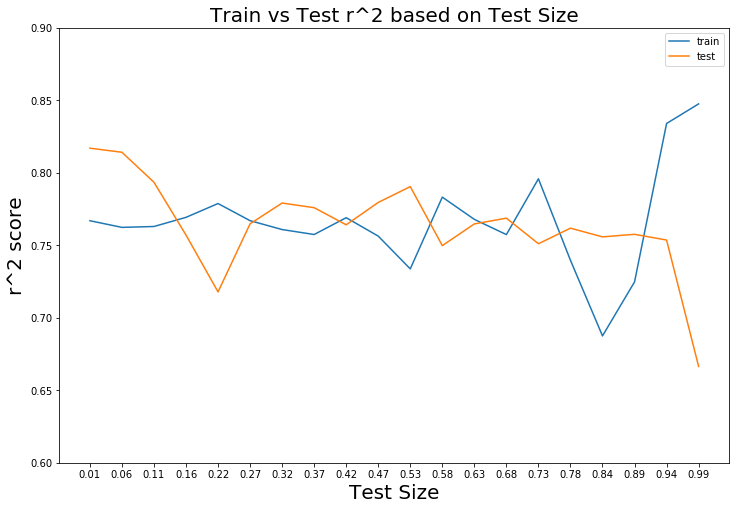

In [16]:
plt.figure(figsize = (12,8))
plt.title('Train vs Test r^2 based on Test Size', fontsize = 20)
plt.xticks(ticks = range(0,20), labels =  np.round(np.linspace(.01,.99,20), 2))
plt.xlabel('Test Size', fontsize = 20)
plt.ylabel('r^2 score', fontsize = 20)
plt.ylim([.6, .9])
plt.plot(r2_train_mean)
plt.plot(r2_test_mean)
plt.legend(labels = ['train', 'test']);

### Bring back dataset and use cross_validate

In [17]:
from sklearn.model_selection import cross_val_score, KFold

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = .25)

In [19]:
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [20]:
lasso = Lasso()

In [21]:
all_accuracies = cross_val_score(estimator = lasso, X = X_train, y = y_train, cv = 5, n_jobs = -1)

In [22]:
all_accuracies

array([0.79333241, 0.7550082 , 0.79092869, 0.7573157 , 0.63021367])

In [23]:
# look up how to identify data points in each fold (use KFold method?)

In [24]:
all_accuracies.mean()

0.7453597366518879

In [25]:
lasso.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [26]:
lasso.score(X_test, y_test)

0.801801115716231

In [27]:
from sklearn.model_selection import cross_validate

all_scores = cross_validate(estimator = lasso, X = X_train, y = y_train, 
                            cv = 10, n_jobs = -1, scoring = ['r2'])

all_scores

{'fit_time': array([0.14321804, 0.002244  , 0.00208497, 0.00357819, 0.00275517,
        0.00285316, 0.00294781, 0.00381112, 0.13901281, 0.0022428 ]),
 'score_time': array([0.00098705, 0.00116014, 0.00076318, 0.00114775, 0.00107884,
        0.00142169, 0.00160909, 0.00143075, 0.00095797, 0.00093627]),
 'test_r2': array([0.81089704, 0.78289057, 0.7340133 , 0.77349716, 0.76393027,
        0.80909877, 0.82207781, 0.70201183, 0.53832237, 0.7218034 ])}

### Gridsearch

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
lasso = Lasso()

In [30]:
param_grid = {
    'alpha': [.1, .5, 1, 2, 5, 10, 20, 100, 200, 1000, 5000],
    'tol': [.001, .01, .1, 1, 10],
    'max_iter' : [5, 10, 50, 100]
}

In [31]:
gs = GridSearchCV(estimator = lasso, param_grid = param_grid)

In [32]:
gs.fit(X_train_sc, y_train)

/Users/nicholasgayliard/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/nicholasgayliard/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 842076580048.8784, tolerance: 6574465870.086247
  positive)
/Users/nicholasgayliard/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 849310602574.2511, tolerance: 6458867118.381154
  positive)
/Users/nicholasgayliard/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. Yo

/Users/nicholasgayliard/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 832843501316.1707, tolerance: 6574465870.086247
  positive)
/Users/nicholasgayliard/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 839982366805.6193, tolerance: 6458867118.381154
  positive)
/Users/nicholasgayliard/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 658420219928.2865, tolerance: 6419510185.723164
  positive)
/Users/nicholasgayliard/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not 

/Users/nicholasgayliard/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 742274341225.4498, tolerance: 6574465870.086247
  positive)
/Users/nicholasgayliard/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 748880619985.45, tolerance: 6458867118.381154
  positive)
/Users/nicholasgayliard/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 584115392183.8672, tolerance: 6419510185.723164
  positive)
/Users/nicholasgayliard/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not co

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.1, 0.5, 1, 2, 5, 10, 20, 100, 200, 1000,
                                   5000],
                         'max_iter': [5, 10, 50, 100],
                         'tol': [0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [33]:
gs.score(X_test_sc, y_test)

0.8005291508196002

In [34]:
gs.best_params_

{'alpha': 1000, 'max_iter': 5, 'tol': 0.1}

In [35]:
gs.cv_results_

{'mean_fit_time': array([0.00128142, 0.00090917, 0.00071836, 0.00061727, 0.0006005 ,
        0.00066702, 0.00076461, 0.00084138, 0.00061766, 0.00077136,
        0.0009613 , 0.00061464, 0.00075404, 0.00056426, 0.0005908 ,
        0.0007515 , 0.00066296, 0.00071716, 0.00056616, 0.00063833,
        0.00080276, 0.00072797, 0.00062609, 0.00060821, 0.00055631,
        0.00089169, 0.00068005, 0.00075976, 0.00055925, 0.00060296,
        0.00058206, 0.00061536, 0.0005703 , 0.00071573, 0.00056545,
        0.00064739, 0.00056958, 0.00059795, 0.00056704, 0.00060217,
        0.00070047, 0.00071462, 0.00062831, 0.00062068, 0.00057705,
        0.00078026, 0.0007627 , 0.00075308, 0.0007387 , 0.0006334 ,
        0.00059017, 0.00059493, 0.00058587, 0.00071708, 0.00064699,
        0.00066598, 0.00067194, 0.00070405, 0.00075237, 0.00073536,
        0.00076445, 0.00085036, 0.00073767, 0.00057332, 0.0005676 ,
        0.00071168, 0.00068371, 0.00060225, 0.00058095, 0.00055091,
        0.00056092, 0.00056299,

In [36]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_max_iter,param_tol,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001281,5.445695e-04,0.000767,1.615575e-04,0.1,5,0.001,"{'alpha': 0.1, 'max_iter': 5, 'tol': 0.001}",0.778488,0.792530,0.675073,0.748745,0.052358,51
1,0.000909,8.167923e-05,0.000632,7.679332e-05,0.1,5,0.01,"{'alpha': 0.1, 'max_iter': 5, 'tol': 0.01}",0.778488,0.792530,0.675073,0.748745,0.052358,51
2,0.000718,1.029643e-04,0.000489,2.922419e-05,0.1,5,0.1,"{'alpha': 0.1, 'max_iter': 5, 'tol': 0.1}",0.778488,0.792530,0.675073,0.748745,0.052358,51
3,0.000617,3.869782e-05,0.000411,8.499510e-06,0.1,5,1,"{'alpha': 0.1, 'max_iter': 5, 'tol': 1}",0.770240,0.778498,0.663694,0.737525,0.052265,173
4,0.000600,2.008888e-05,0.000442,2.444562e-05,0.1,5,10,"{'alpha': 0.1, 'max_iter': 5, 'tol': 10}",0.721836,0.719130,0.633107,0.691395,0.041191,217
5,0.000667,4.969120e-05,0.000535,2.047286e-05,0.1,10,0.001,"{'alpha': 0.1, 'max_iter': 10, 'tol': 0.001}",0.777559,0.792399,0.676039,0.748713,0.051695,99
6,0.000765,1.594149e-04,0.000509,6.912330e-05,0.1,10,0.01,"{'alpha': 0.1, 'max_iter': 10, 'tol': 0.01}",0.777559,0.792399,0.676039,0.748713,0.051695,99
7,0.000841,7.131572e-05,0.000570,4.535819e-05,0.1,10,0.1,"{'alpha': 0.1, 'max_iter': 10, 'tol': 0.1}",0.777559,0.792399,0.676039,0.748713,0.051695,99
8,0.000618,2.959102e-05,0.000420,1.210442e-05,0.1,10,1,"{'alpha': 0.1, 'max_iter': 10, 'tol': 1}",0.770240,0.778498,0.663694,0.737525,0.052265,173
9,0.000771,1.194037e-04,0.000530,1.151840e-04,0.1,10,10,"{'alpha': 0.1, 'max_iter': 10, 'tol': 10}",0.721836,0.719130,0.633107,0.691395,0.041191,217


### Pipelines

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA

In [38]:
scaler = StandardScaler()
pca = PCA()
knn = KNeighborsRegressor()

In [39]:
pipe = Pipeline(steps = [('scaler', scaler), ('pca', pca), ('knn', knn)])

In [40]:
param_grid = {
    'pca__n_components' : [2, 3, 4, 5],
    'knn__algorithm' : ['auto', 'ball_tree', 'brute', 'kd_tree'],
    'knn__n_neighbors' : [5, 9, 11, 13, 15, 17, 21, 25, 29],
    'knn__weights' : ['uniform', 'distance']
}

In [41]:
gs_pipe = GridSearchCV(pipe, param_grid, cv = 5, scoring='r2')

In [42]:
gs_pipe.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('knn',
                                        KNeighborsRegressor(algorithm='auto',
                                                            leaf_size=30,
                                                            me

In [43]:
gs_pipe.score(X_test, y_test)

0.8330196634194433

In [44]:
gs_pipe.best_params_

{'knn__algorithm': 'auto',
 'knn__n_neighbors': 17,
 'knn__weights': 'distance',
 'pca__n_components': 5}

In [45]:
pd.DataFrame(gs_pipe.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__algorithm,param_knn__n_neighbors,param_knn__weights,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005533,0.003866,0.001839,0.000290,auto,5,uniform,2,"{'knn__algorithm': 'auto', 'knn__n_neighbors':...",0.812948,0.761053,0.800896,0.816241,0.692601,0.776777,0.046403,285
1,0.004351,0.000743,0.002129,0.000449,auto,5,uniform,3,"{'knn__algorithm': 'auto', 'knn__n_neighbors':...",0.824775,0.740497,0.786730,0.829313,0.729619,0.782190,0.041356,249
2,0.003071,0.000478,0.001986,0.000055,auto,5,uniform,4,"{'knn__algorithm': 'auto', 'knn__n_neighbors':...",0.828818,0.747368,0.771364,0.819102,0.720098,0.777360,0.041472,282
3,0.002676,0.000062,0.002177,0.000119,auto,5,uniform,5,"{'knn__algorithm': 'auto', 'knn__n_neighbors':...",0.845663,0.761790,0.800931,0.811845,0.740822,0.792231,0.037105,114
4,0.003149,0.000037,0.001567,0.000092,auto,5,distance,2,"{'knn__algorithm': 'auto', 'knn__n_neighbors':...",0.803953,0.760509,0.791763,0.838828,0.730820,0.785175,0.036952,209
5,0.003199,0.000036,0.001656,0.000023,auto,5,distance,3,"{'knn__algorithm': 'auto', 'knn__n_neighbors':...",0.817664,0.744609,0.788634,0.828568,0.726359,0.781172,0.039921,255
6,0.002593,0.000016,0.001892,0.000023,auto,5,distance,4,"{'knn__algorithm': 'auto', 'knn__n_neighbors':...",0.831950,0.748007,0.777195,0.818574,0.726844,0.780524,0.040097,262
7,0.002650,0.000064,0.002223,0.000079,auto,5,distance,5,"{'knn__algorithm': 'auto', 'knn__n_neighbors':...",0.841128,0.762142,0.802825,0.814049,0.753642,0.794771,0.032686,90
8,0.003344,0.000100,0.001602,0.000027,auto,9,uniform,2,"{'knn__algorithm': 'auto', 'knn__n_neighbors':...",0.841529,0.761566,0.809149,0.824208,0.705305,0.788382,0.049294,182
9,0.003267,0.000072,0.001814,0.000074,auto,9,uniform,3,"{'knn__algorithm': 'auto', 'knn__n_neighbors':...",0.837003,0.750349,0.794413,0.841875,0.709246,0.786592,0.050877,190


In [46]:
preds = gs_pipe.predict(X_test)

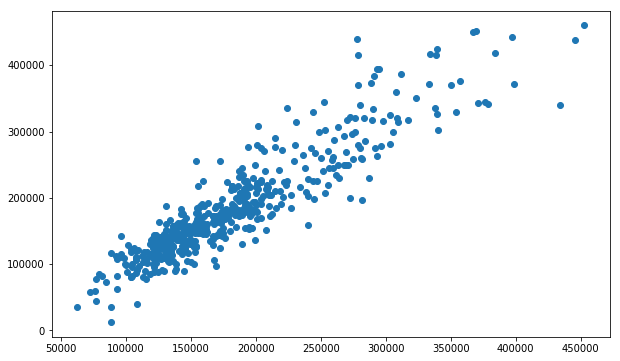

In [47]:
plt.figure(figsize = (10,6))
plt.scatter(preds, y_test);

In [48]:
gs_pipe.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('knn',
                                        KNeighborsRegressor(algorithm='auto',
                                                            leaf_size=30,
                                                            me

In [49]:
gs_pipe.score(X, y)

0.9996231503510022

### Randomized Search - Much faster than GridSearch to get ballpark hyperparamater values

In [54]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

In [55]:
# specify parameters and distributions to sample from
param_dist = {'tol' : np.linspace(.00001, 1, 1000),
    'alpha': np.linspace(.001, 2000, 100)}

In [56]:
lasso = Lasso()

In [57]:
rs = RandomizedSearchCV(lasso, param_dist, n_iter = 1000)

In [58]:
rs.fit(X_train_sc, y_train)

/Users/nicholasgayliard/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=1000, normalize=False,
                                   positive=False, precompute=False,
                                   random_state=None, selection='cyclic',
                                   tol=0.0001, warm_start=False),
                   iid='warn', n_iter=1000, n_jobs=None,
                   param_distributions={'alpha': array([1.00000000e-03, 2.02030101e+01, 4.0...
       9.80981171e-01, 9.81982162e-01, 9.82983153e-01, 9.83984144e-01,
       9.84985135e-01, 9.85986126e-01, 9.86987117e-01, 9.87988108e-01,
       9.88989099e-01, 9.89990090e-01, 9.90991081e-01, 9.91992072e-01,
       9.92993063e-01, 9.93994054e-01, 9.94995045e-01, 9.95996036e-01,
       9.96997027e-01, 9.97998018e-01, 9.98999009e-01, 1.00000000e+00])},
                   pre_dispatch='2*n_jobs', random_state=None, refit=Tru

In [59]:
rs.best_estimator_

Lasso(alpha=1797.979898989899, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.06807738738738739, warm_start=False)

In [60]:
rs.score(X_test_sc, y_test)

0.7990113154653259

### Now we can GridSearch more specifically around these parameters